In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
file_path = "../../datasets/parkinsons.csv"
df = pd.read_csv(file_path)

In [3]:
if 'name' in df.columns:
    df = df.drop(columns=['name'])

In [4]:
X = df.drop(columns=['status'])
y = df['status']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
y_classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight="balanced", classes=y_classes, y=y_train)
class_weight_dict = {y_classes[i]: class_weights[i] for i in range(len(y_classes))}

In [8]:
balanced_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict)
balanced_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight={np.int64(0): np.float64(2.0526315789473686),
                                     np.int64(1): np.float64(0.6610169491525424)},
                       random_state=42)

In [9]:
y_pred_balanced = balanced_model.predict(X_test_scaled)
y_pred_prob = balanced_model.predict_proba(X_test_scaled)[:, 1] 

In [10]:
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f'Accuracy: {accuracy_balanced * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))

Accuracy: 92.31%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



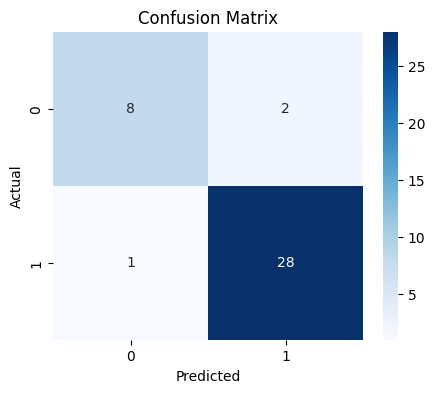

In [11]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_balanced), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
roc_auc_balanced = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc_balanced:.2f}')


ROC-AUC Score: 0.97


In [14]:
import pickle
file_name = 'parkinsons_model.sav'
pickle.dump(balanced_model, open(file_name, 'wb'))